## Predictive Analysis of Market Trends to Predict Stock Price   

## Pre Processing Of Data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,median_absolute_error

In [2]:
def splitDate(df):
    X_date = []
    for d in df.index:
        d = str(d).split(' ')[0]
        x = []
        x.append(int(d.split('-')[0]))
        x.append(int(d.split('-')[1]))
        x.append(int(d.split('-')[2]))
        X_date.append(x)
    
    X_date = np.array(X_date,dtype=np.int64) 
    return [X_date[:,:1],X_date[:,1:2],X_date[:,2:3]]

In [32]:
def calculateError(predicted,actual):
    n = len(predicted)
    s = 0
    for i in range(n):
        d = (((predicted[i]-actual[i])/actual[i])*100)
        s += d
    return s/float(n)

In [33]:
#Function to read data from csv file and create a dataframe
def getDataSplitInTrainTest(fname,ftrends):
    #Read into dataframe
    df = pd.read_csv(fname,index_col='Date',
                     parse_dates=True,na_values=['nan'])
    
       
    
    df['Date'] = pd.to_datetime(df.index).astype(np.int64)
    df['Year'],df['Month'],df['Day'] = splitDate(df)
    
    df_trends = pd.read_csv(ftrends,index_col='Date',parse_dates=True)
        
    #Stat and End Date for train and test data respectivly
    #Train Data
    train_start_date = '2016-10-01'
    train_end_date = '2016-12-01'
    train_dates = pd.date_range(train_start_date,train_end_date)
    
    #Test Data
    test_start_date = '2016-12-15'    
    test_end_date = '2016-12-30'
    test_dates = pd.date_range(test_start_date,test_end_date)
    
    #Our dataframe wil have date as index and one column as open price
    df_train = pd.DataFrame(index=train_dates) 
    df_test = pd.DataFrame(index=test_dates) 

    #Join
    df_train = df_train.join(df)
    df_test = df_test.join(df)
    
    #drop nan
    df_train = df_train.dropna()
    df_test = df_test.dropna()
    
    #For trends value
    df_train1 = df_train.join(df_trends).dropna()
    df_test1 = df_test.join(df_trends).dropna()
    
    #Return df_train and df_train as a tuple
    return (df_train1,df_test1)
    
#Calling function to get processed data
df_train,df_test = getDataSplitInTrainTest('AAPL.csv','TRENDS.csv')

## Data Visualization

#### Train Data

In [34]:
#First Five samples
df_train.head()

,Open,High,Low,Close,Adj Close,Volume,Date,Year,Month,Day,Trend
2016-10-03,112.709999,113.050003,112.279999,112.519997,110.569603,21701800.0,1.475453e+18,2016.0,10.0,3.0,66
2016-10-04,113.059998,114.309998,112.629997,113.000000,111.041290,29736800.0,1.475539e+18,2016.0,10.0,4.0,66
2016-10-05,113.400002,113.660004,112.690002,113.050003,111.090431,21453100.0,1.475626e+18,2016.0,10.0,5.0,66
2016-10-06,113.699997,114.339996,113.129997,113.889999,111.915863,28779300.0,1.475712e+18,2016.0,10.0,6.0,66
2016-10-07,114.309998,114.559998,113.510002,114.059998,112.082916,24358400.0,1.475798e+18,2016.0,10.0,7.0,66


### Test Data

In [35]:
#First Five samples
df_test[['Year','Month','Day','Open']]

,Year,Month,Day,Open
2016-12-15,2016.0,12.0,15.0,115.379997
2016-12-16,2016.0,12.0,16.0,116.470001
2016-12-19,2016.0,12.0,19.0,115.800003
2016-12-20,2016.0,12.0,20.0,116.739998
2016-12-21,2016.0,12.0,21.0,116.800003
2016-12-22,2016.0,12.0,22.0,116.349998
2016-12-23,2016.0,12.0,23.0,115.589996
2016-12-27,2016.0,12.0,27.0,116.519997
2016-12-28,2016.0,12.0,28.0,117.519997
2016-12-29,2016.0,12.0,29.0,116.449997


### Plotting Graph

In [36]:
def plotDataframe(df,title):
    ax = df.plot(title=title,fontsize=10,ylim=(105,125))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()   

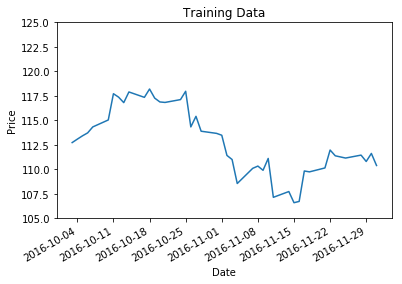

In [37]:
#Plot
plotDataframe(df_train['Open'],"Training Data")

## Splitting dataframe into features and target (X,y)

In [38]:
#Train
#X_train = np.asarray([pd.to_datetime(df_train.index).astype(np.int64),df_train['Trend']])
X_train = df_train[['Year','Month','Day','Trend']]
y_train = df_train['Open']

#test
#X_test = np.array([pd.to_datetime(df_test.index).astype(np.int64),df_test['Trend']])
X_test = df_test[['Year','Month','Day','Trend']]
y_test = df_test['Open']

from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# ML Algorithm

### Linear Regression

% Change : -0.7013857073548381


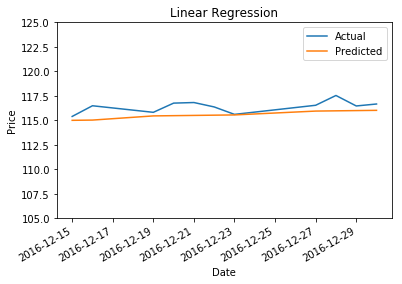

In [39]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import explained_variance_score
model_linear_reg = LinearRegression() 
model_linear_reg.fit(X_train,y_train)
df_lr = pd.DataFrame(index=df_test.index)
df_lr['Actual'] = y_test
df_lr['Predicted'] = model_linear_reg.predict(X_test)
print("% Change : "+str(calculateError(df_lr['Predicted'],df_lr['Actual'])))
plotDataframe(df_lr,"Linear Regression")

In [40]:
df_lr[:10]

,Actual,Predicted
2016-12-15,115.379997,114.982563
2016-12-16,116.470001,115.007608
2016-12-19,115.800003,115.434012
2016-12-20,116.739998,115.459057
2016-12-21,116.800003,115.484103
2016-12-22,116.349998,115.509148
2016-12-23,115.589996,115.534194
2016-12-27,116.519997,115.927098
2016-12-28,117.519997,115.952143
2016-12-29,116.449997,115.977189


## SGD Regrssion

% Change : -1.805798566256619


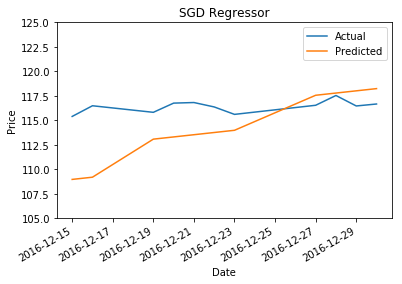

In [41]:
from sklearn.linear_model import SGDRegressor
model_dt = SGDRegressor(max_iter=1000,alpha=0.0001)
model_dt.fit(X_train,y_train)
df_sgd = pd.DataFrame(index=df_test.index)
df_sgd['Actual'] = y_test
df_sgd['Predicted'] = model_dt.predict(X_test)
print("% Change : "+str(calculateError(df_sgd['Predicted'],df_sgd['Actual'])))
plotDataframe(df_sgd,"SGD Regressor")

In [13]:
df_sgd[:10]

,Actual,Predicted
2016-12-15,115.379997,108.972979
2016-12-16,116.470001,109.194849
2016-12-19,115.800003,113.078968
2016-12-20,116.739998,113.300838
2016-12-21,116.800003,113.522708
2016-12-22,116.349998,113.744578
2016-12-23,115.589996,113.966447
2016-12-27,116.519997,117.536018
2016-12-28,117.519997,117.757888
2016-12-29,116.449997,117.979758


## Decision Tree

% Change : -0.5221749600126558


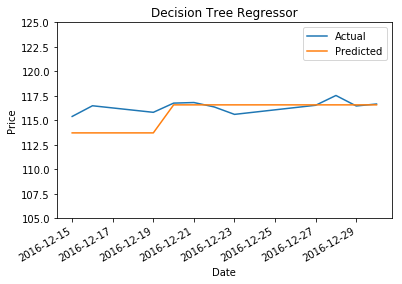

In [14]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(max_depth=2)
model_dt.fit(X_train,y_train)
df_dt = pd.DataFrame(index=df_test.index)
df_dt['Actual'] = y_test
df_dt['Predicted'] = model_dt.predict(X_test)
print("% Change : "+str(calculateError(df_dt['Predicted'],df_dt['Actual'])))
plotDataframe(df_dt,"Decision Tree Regressor")

In [15]:
df_dt[:10]

,Actual,Predicted
2016-12-15,115.379997,113.699998
2016-12-16,116.470001,113.699998
2016-12-19,115.800003,113.699998
2016-12-20,116.739998,116.561333
2016-12-21,116.800003,116.561333
2016-12-22,116.349998,116.561333
2016-12-23,115.589996,116.561333
2016-12-27,116.519997,116.561333
2016-12-28,117.519997,116.561333
2016-12-29,116.449997,116.561333


### Random Forest Regressor

% Change : -0.5702904709178195


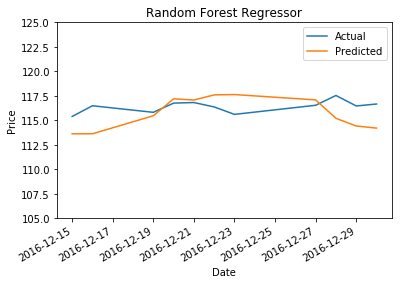

In [16]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100,random_state=45)
model_rf.fit(X_train,y_train)
df_rf = pd.DataFrame(index=df_test.index)
df_rf['Actual'] = y_test
df_rf['Predicted'] = model_rf.predict(X_test)
print("% Change : "+str(calculateError(df_rf['Predicted'],df_rf['Actual'])))
plotDataframe(df_rf,"Random Forest Regressor")

In [17]:
df_rf[:10]

,Actual,Predicted
2016-12-15,115.379997,113.607699
2016-12-16,116.470001,113.607699
2016-12-19,115.800003,115.449897
2016-12-20,116.739998,117.177897
2016-12-21,116.800003,117.056300
2016-12-22,116.349998,117.580598
2016-12-23,115.589996,117.614199
2016-12-27,116.519997,117.068697
2016-12-28,117.519997,115.189399
2016-12-29,116.449997,114.403401


### KNN Regressor

In [18]:
from sklearn.neighbors import KNeighborsRegressor

% Change : -1.5977740660076187


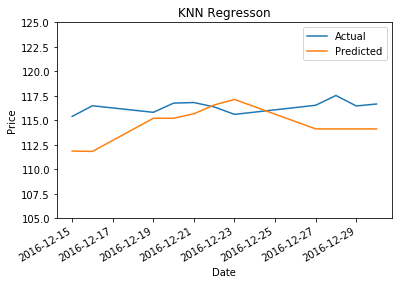

In [19]:
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train,y_train)
df_knn = pd.DataFrame(index=df_test.index)
df_knn['Actual'] = y_test
df_knn['Predicted'] = model.predict(X_test)
print("% Change : "+str(calculateError(df_knn['Predicted'],df_knn['Actual'])))
plotDataframe(df_knn,"KNN Regresson")

In [20]:
df_rf[:10]

,Actual,Predicted
2016-12-15,115.379997,113.607699
2016-12-16,116.470001,113.607699
2016-12-19,115.800003,115.449897
2016-12-20,116.739998,117.177897
2016-12-21,116.800003,117.056300
2016-12-22,116.349998,117.580598
2016-12-23,115.589996,117.614199
2016-12-27,116.519997,117.068697
2016-12-28,117.519997,115.189399
2016-12-29,116.449997,114.403401


In [21]:
def analysis():
    df_compare = pd.DataFrame(index=df_test.index)
    df_compare['actual'] = y_test
    df_compare['Linear Reg'] = df_lr['Predicted']
    df_compare['SGD'] = df_sgd['Predicted']
    df_compare['Decision Tree'] = df_dt['Predicted']
    df_compare['Random Forest'] = df_rf['Predicted']
    df_compare['KNN'] = df_knn['Predicted']
    return df_compare

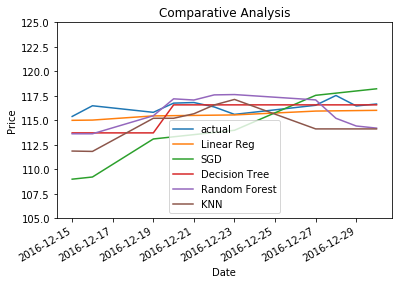

In [22]:
plotDataframe(analysis(),"Comparative Analysis")

In [23]:
df_compare = analysis()
df_compare.to_csv("Comparative_Analysis.csv",sep=",")